In [1]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [2]:
kensa_url = 'https://stopcovid19.metro.tokyo.lg.jp/cards/number-of-inspection-persons/'
yousei_url = 'https://stopcovid19.metro.tokyo.lg.jp/cards/number-of-confirmed-cases/'

r = requests.get(kensa_url , timeout=10, params=None)
soup = BeautifulSoup(r.text,'html.parser')
kensa_data = soup.select('.text-end')

r = requests.get(yousei_url , timeout=10, params=None)
soup = BeautifulSoup(r.text,'html.parser')
yousei_data = soup.select('.text-end')

In [3]:
kensa_list = []
yousei_list = []
num_list = []
num = 0

for i in range(2, len(kensa_data), 2):
        kensa_list.append(int(kensa_data[i].string))
        yousei_list.append(int(yousei_data[i].string))
        num_list.append(num)
        num = num + 1

kensa_list.reverse()
yousei_list.reverse()

In [4]:
kensa_total = 0
yousei_total = 0
kensa_yousei_list = []

for i in range(len(kensa_list)):
    yousei_total =  yousei_total + int(yousei_list[i])
    
    if kensa_total == 0:
        kensa_yousei_list.append(0)
    else:
        kensa_yousei_list.append(yousei_total/kensa_total)

    kensa_total =  kensa_total + int(kensa_list[i])

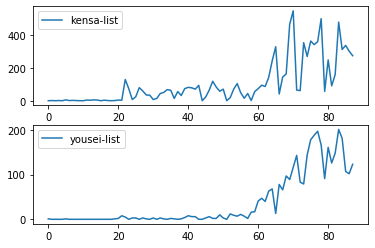

In [5]:
plt.subplot(2,1,1)
plt.plot(num_list, kensa_list, label="kensa-list")
plt.legend()
    
plt.subplot(2,1,2)
plt.plot(num_list, yousei_list, label="yousei-list")
plt.legend()

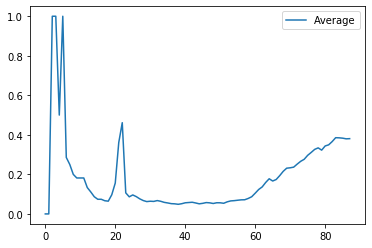

In [6]:
plt.plot(num_list, kensa_yousei_list, label="Average")
plt.legend()
plt.show()